<a href="https://colab.research.google.com/github/atikhasan007/DeepLearning/blob/main/Introduction_to_PyTroch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
torch.__version__

'2.8.0+cu126'

In [3]:
#scale
my_pytorch_scalar  = torch.tensor(7)

In [4]:
my_pytorch_scalar

tensor(7)

In [5]:
my_pytorch_scalar.ndim

0

In [6]:
my_pytorch_scalar.item()

7

In [7]:
# 1 dimention is called vector
my_pytorch_vector = torch.tensor([7,7])

In [8]:
my_pytorch_vector

tensor([7, 7])

In [9]:
my_pytorch_vector.ndim

1

In [10]:
my_list =[1,2,3]


In [11]:
my_list

[1, 2, 3]

In [12]:
my_pytorch_vector.shape

torch.Size([2])

In [13]:
#matrix
my_pytorch_matrix = torch.tensor([[1,2,3],[4,5,6]])

In [14]:
my_pytorch_matrix.shape

torch.Size([2, 3])

**Fashion MNIST**

In [15]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [16]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

PyTorch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126


In [17]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), #list akre ase tai totensor hisabe
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.0MB/s]


In [18]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [19]:
image, label = train_data[0]

In [20]:
label

9

In [21]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [22]:
image.shape

torch.Size([1, 28, 28])

In [23]:
len(train_data.data)

60000

In [24]:
len(test_data.data)

10000

In [25]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

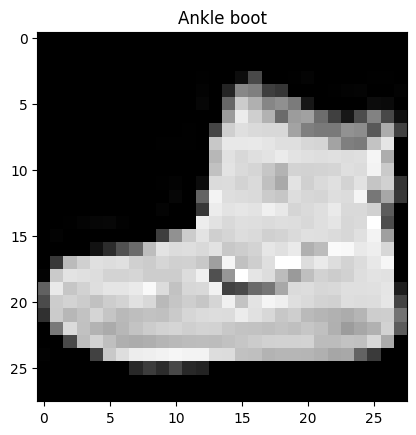

In [26]:
#visualize
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.show()

In [27]:
#data loader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)




In [28]:
train_features, train_labels = next(iter(train_dataloader))


In [29]:
flatten_model = nn.Flatten()
x = train_features[0]
output = flatten_model(x)
print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [30]:
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)

    )

  def forward(self,x):
    return self.layer_stack(x)

In [31]:
torch.manual_seed(42)
model_0 = FashionMNISTModel(input_shape=28*28,
                            hidden_units=10,
                            output_shape=len(train_data.classes))
model_0 = model_0.to("cuda")

In [32]:
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)